In [35]:
import matplotlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier    
from sklearn.ensemble import RandomForestClassifier

In [48]:
data=pd.read_csv(r"C:\Users\PMLS\Downloads\Reduced_Construction_Waste_Prediction_Dataset.csv")
data

,Year,Type of Construction Project,Project Size (sq.m),Concrete Volume (cubic meters),Concrete Grade,Estimated Concrete Waste (cubic Meter),Concrete Waste Ratio (%),Concrete Waste Cause,Disposal Cost (PKR),Historical Waste Data (cubic meters),Construction Practice Trends,Economic Factors,Regulatory Factors,Environmental Policies
0,2022,Residential,6501,1272,M10 - M20,115,1.96,Batching,12828,40,Traditional,Fluctuating,Strict,Rigorous
1,2022,Residential,4262,1049,M10 - M20,73,4.79,Concrete Pouring,30478,228,Sustainable,Growing,Moderate,Rigorous
2,2022,Industrial,9508,1665,M30 - M40,26,0.56,Concrete Pouring,41636,62,Automated,Growing,Strict,Rigorous
3,2022,Infrastructure,6319,830,M20 - M30,103,4.23,Concrete Pouring,47313,278,Modern,Fluctuating,Moderate,Rigorous
4,2022,Commercial,8532,268,M20 - M30,63,1.15,Transportation,13856,172,Modern,Recession,Strict,Minimal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100295,2010,Industrial,7874,349,M40 - M50,223,3.58,Batching,34605,151,Traditional,Recession,Lenient,NaN
100296,2010,Industrial,1428,822,M20 - M30,44,4.50,Transportation,37229,186,Automated,Growing,NaN,NaN
100297,2010,Industrial,9478,436,M30 - M40,16,4.98,Batching,44456,342,Modern,Growing,Moderate,Minimal
100298,2010,Residential,4472,1656,M40 - M50,246,4.06,Transportation,42695,477,Automated,Recession,Moderate,Rigorous


In [49]:
data.isnull().sum()

Year                                          0
Type of Construction Project                  0
Project Size (sq.m)                           0
Concrete Volume (cubic meters)                0
Concrete Grade                                0
Estimated Concrete Waste (cubic Meter)        0
Concrete Waste Ratio (%)                      0
Concrete Waste Cause                          0
Disposal Cost (PKR)                           0
Historical Waste Data (cubic meters)          0
Construction Practice Trends                  0
Economic Factors                              0
Regulatory Factors                        25240
Environmental Policies                    25138
dtype: int64

In [50]:
data.columns

Index(['Year', 'Type of Construction Project', 'Project Size (sq.m)',
       'Concrete Volume (cubic meters)', 'Concrete Grade',
       'Estimated Concrete Waste (cubic Meter)', 'Concrete Waste Ratio (%)',
       'Concrete Waste Cause', 'Disposal Cost (PKR)',
       'Historical Waste Data (cubic meters)', 'Construction Practice Trends',
       'Economic Factors', 'Regulatory Factors', 'Environmental Policies'],
      dtype='object')

In [51]:
df = data.drop(['Regulatory Factors', 'Environmental Policies'],axis=1)

In [47]:
df

,Year,Type of Construction Project,Project Size (sq.m),Concrete Volume (cubic meters),Concrete Grade,Estimated Concrete Waste (cubic Meter),Concrete Waste Ratio (%),Concrete Waste Cause,Disposal Cost (PKR),Historical Waste Data (cubic meters),Construction Practice Trends,Economic Factors
0,2022,Residential,6501,1272,M10 - M20,115,1.96,Batching,12828,40,Traditional,Fluctuating
1,2022,Residential,4262,1049,M10 - M20,73,4.79,Concrete Pouring,30478,228,Sustainable,Growing
2,2022,Industrial,9508,1665,M30 - M40,26,0.56,Concrete Pouring,41636,62,Automated,Growing
3,2022,Infrastructure,6319,830,M20 - M30,103,4.23,Concrete Pouring,47313,278,Modern,Fluctuating
4,2022,Commercial,8532,268,M20 - M30,63,1.15,Transportation,13856,172,Modern,Recession
...,...,...,...,...,...,...,...,...,...,...,...,...
100295,2010,Industrial,7874,349,M40 - M50,223,3.58,Batching,34605,151,Traditional,Recession
100296,2010,Industrial,1428,822,M20 - M30,44,4.50,Transportation,37229,186,Automated,Growing
100297,2010,Industrial,9478,436,M30 - M40,16,4.98,Batching,44456,342,Modern,Growing
100298,2010,Residential,4472,1656,M40 - M50,246,4.06,Transportation,42695,477,Automated,Recession


In [52]:
from sklearn.preprocessing import LabelEncoder

df[['Type of Construction Project', 
        'Concrete Grade',
       'Concrete Waste Cause', 
        'Construction Practice Trends',
       'Economic Factors']]=data[['Type of Construction Project', 
        'Concrete Grade',
       'Concrete Waste Cause', 'Construction Practice Trends',
       'Economic Factors']].apply(LabelEncoder().fit_transform)
df

,Year,Type of Construction Project,Project Size (sq.m),Concrete Volume (cubic meters),Concrete Grade,Estimated Concrete Waste (cubic Meter),Concrete Waste Ratio (%),Concrete Waste Cause,Disposal Cost (PKR),Historical Waste Data (cubic meters),Construction Practice Trends,Economic Factors
0,2022,3,6501,1272,0,115,1.96,0,12828,40,3,0
1,2022,3,4262,1049,0,73,4.79,1,30478,228,2,1
2,2022,1,9508,1665,2,26,0.56,1,41636,62,0,1
3,2022,2,6319,830,1,103,4.23,1,47313,278,1,0
4,2022,0,8532,268,1,63,1.15,3,13856,172,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
100295,2010,1,7874,349,3,223,3.58,0,34605,151,3,2
100296,2010,1,1428,822,1,44,4.50,3,37229,186,0,1
100297,2010,1,9478,436,2,16,4.98,0,44456,342,1,1
100298,2010,3,4472,1656,3,246,4.06,3,42695,477,0,2


In [57]:
x=df.drop('Estimated Concrete Waste (cubic Meter)', axis=1)
y=df['Estimated Concrete Waste (cubic Meter)']
y

0         115
1          73
2          26
3         103
4          63
         ... 
100295    223
100296     44
100297     16
100298    246
100299    115
Name: Estimated Concrete Waste (cubic Meter), Length: 100300, dtype: int64

In [58]:
x


,Year,Type of Construction Project,Project Size (sq.m),Concrete Volume (cubic meters),Concrete Grade,Concrete Waste Ratio (%),Concrete Waste Cause,Disposal Cost (PKR),Historical Waste Data (cubic meters),Construction Practice Trends,Economic Factors
0,2022,3,6501,1272,0,1.96,0,12828,40,3,0
1,2022,3,4262,1049,0,4.79,1,30478,228,2,1
2,2022,1,9508,1665,2,0.56,1,41636,62,0,1
3,2022,2,6319,830,1,4.23,1,47313,278,1,0
4,2022,0,8532,268,1,1.15,3,13856,172,1,2
...,...,...,...,...,...,...,...,...,...,...,...
100295,2010,1,7874,349,3,3.58,0,34605,151,3,2
100296,2010,1,1428,822,1,4.50,3,37229,186,0,1
100297,2010,1,9478,436,2,4.98,0,44456,342,1,1
100298,2010,3,4472,1656,3,4.06,3,42695,477,0,2


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=46)

In [60]:
from sklearn.linear_model import LinearRegression
m=LinearRegression()
m.fit(X_train,y_train)

LinearRegression()

In [61]:
pred=m.predict(X_test)
pred

array([155.08521819, 155.81654348, 154.5113117 , ..., 154.37954147,
       153.68061593, 154.1868881 ])

In [62]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred, multioutput='raw_values')

array([7013.01725506])

In [63]:
from sklearn.metrics import r2_score
r2_score(y_test,pred, force_finite=False)

-5.8984426436481385e-05

In [64]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred, multioutput='raw_values')


array([72.56612238])

In [66]:
c=df.corr()
c

,Year,Type of Construction Project,Project Size (sq.m),Concrete Volume (cubic meters),Concrete Grade,Estimated Concrete Waste (cubic Meter),Concrete Waste Ratio (%),Concrete Waste Cause,Disposal Cost (PKR),Historical Waste Data (cubic meters),Construction Practice Trends,Economic Factors
Year,1.000000,-0.000341,0.000808,-0.002906,-0.001107,0.007099,0.002349,0.004839,0.004205,-0.000473,0.000642,-0.007044
Type of Construction Project,-0.000341,1.000000,-0.000451,0.002914,0.001834,0.000467,0.000217,-0.001394,-0.004503,-0.005412,0.001178,0.001211
Project Size (sq.m),0.000808,-0.000451,1.000000,-0.004322,0.000640,-0.003604,-0.003542,0.007755,-0.002401,0.000105,0.003949,0.000756
Concrete Volume (cubic meters),-0.002906,0.002914,-0.004322,1.000000,-0.000858,-0.001112,0.000845,-0.004208,-0.001960,-0.005594,-0.002352,-0.001163
Concrete Grade,-0.001107,0.001834,0.000640,-0.000858,1.000000,0.001245,0.004368,0.002784,-0.001511,0.001827,-0.003280,0.001494
Estimated Concrete Waste (cubic Meter),0.007099,0.000467,-0.003604,-0.001112,0.001245,1.000000,0.004052,0.001261,0.002483,-0.003435,-0.002385,-0.004383
Concrete Waste Ratio (%),0.002349,0.000217,-0.003542,0.000845,0.004368,0.004052,1.000000,-0.004332,-0.003359,0.006115,-0.000485,-0.001526
Concrete Waste Cause,0.004839,-0.001394,0.007755,-0.004208,0.002784,0.001261,-0.004332,1.000000,0.004279,0.001975,0.002014,0.002069
Disposal Cost (PKR),0.004205,-0.004503,-0.002401,-0.001960,-0.001511,0.002483,-0.003359,0.004279,1.000000,-0.001074,-0.001691,-0.002148
Historical Waste Data (cubic meters),-0.000473,-0.005412,0.000105,-0.005594,0.001827,-0.003435,0.006115,0.001975,-0.001074,1.000000,-0.001939,0.001706


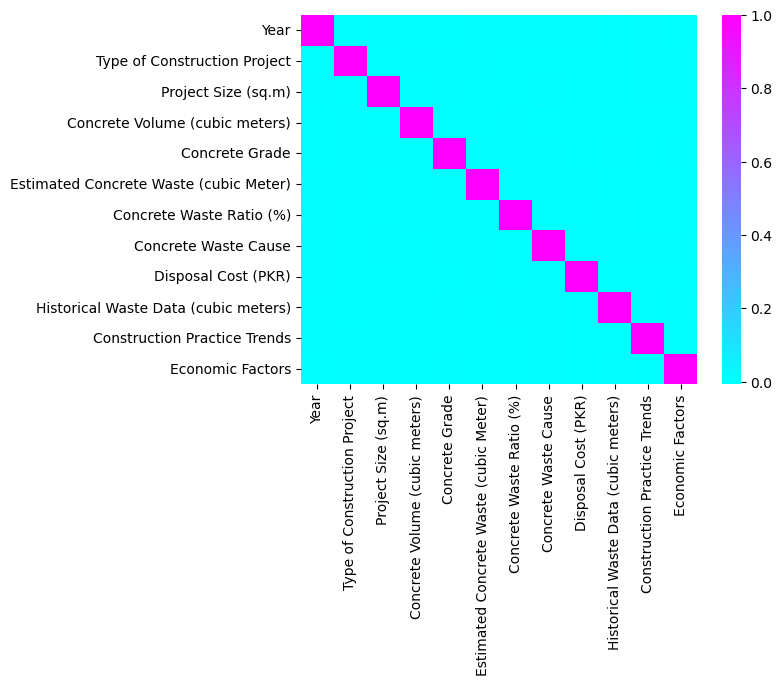

In [72]:
import seaborn as sb
sb.heatmap(c,cmap='cool')
plt.show()

In [75]:
from sklearn.svm import SVR
medel=SVR()
medel.fit(X_train,y_train)

SVR()

In [76]:
pred1=medel.predict(X_test)
pred1

array([154.684755  , 153.53822237, 155.44046337, ..., 155.72705096,
       155.14153852, 154.67609486])

In [77]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred1, multioutput='raw_values')

array([7012.2962385])

In [78]:
from sklearn.metrics import r2_score
r2_score(y_test,pred1, force_finite=False)

4.383281477282619e-05

In [79]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred1, multioutput='raw_values')


array([72.56889106])

In [89]:
arry=[[3000,	3,	6000,	1272,	0,	1.96,	0,	12300,	60,	3,	0]]

In [90]:
medel.predict(arry)

c:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([153.28117282])